# 6.2 Solutions

###### Set Up

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
%config InlineBackend.figure_format='svg'

In [4]:
FONT_FAMILY = 'DejaVu Sans'
FONT_SCALE = 1.3

###### Load and preprocess the dataset

The exercises will be based on a dataset called **cereals**. Information about authors and contributors to this dataset can be found [here](https://www.kaggle.com/code/hiralmshah/nutrition-data-analysis-from-80-cereals). 
The dataset has 77 records and 16 columns. The columns are:
- **name** - name of the cereal
- **mfr** -stands for the manufacturer of the cereals. You can find the association of the letter in the dataset with the real name in the `manufacturers_df` we have loaded below.
- **type** - hot or cold, the preferred way of eating
- **calories** - amount of calories per portion
- **fat** - grams of fat
- **sodium** - milligrams of sodium
- **fiber** - amount in grams per portion
- **carbo** - amount of carbohydrates in grams
- **sugars** - amount in gram per portion
- **potass** - amount in milligrams per portion
- **vitamins** - vitamins and minerals (0, 25, 100) in percentage
- **shelf** - shelf they appear in supermarket (1, 2 or 3 from the floor)
- **weight** - weight in ounces for one portion
- **cups** - number of cups per portion
- **rating** - rating of the cereals

In [8]:
# loading main dataset
cereals = pd.read_csv('data/cereal.csv', sep=',')
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [9]:
#loading dataset that mas manufacturers letters to their names
manufacturers_df = pd.read_csv('data/manufacturers.csv')
manufacturers_df

,letter,company_name
0,A,American Home Food Products
1,G,General Mills
2,K,Kelloggs
3,N,Nabisco
4,P,Post
5,Q,Quaker Oats
6,R,Ralston Purina


In [66]:
cereals_with_mfr_names = pd.merge(cereals, manufacturers_df, 
                                  left_on=cereals.mfr, 
                                  right_on=manufacturers_df.letter)

###### 6.2.1 Exercise 1

Plot the number of products per manufacturer by displaying the manufacturer's name instead of the letter that appears in the `cereals_df` dataframe. All the data you need is found in the `cereals_with_mfr_names` dataframe. Your task is to visualize the data.

One possible solution can be the one in the next cell. Keep in mind that you might have choosen another method for the visualization. Since you might have chosen another method for visualizing the data, to check that your solution is correct, the numbers in the visualizations should match. 

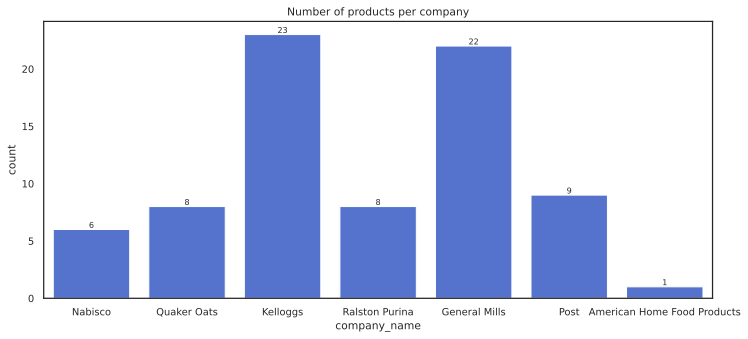

In [67]:
#plot the results
sns.set(rc={'figure.figsize': (12, 5), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=0.9):
    # seaborn's countplot
    ax = sns.countplot(
        data=cereals_with_mfr_names[['company_name', 'name']],
        x='company_name',
        color='royalblue' 
    )

    #use this command to display the number of products for each company
    ax.bar_label(ax.containers[0], size=8)
    ax.set_title('Number of products per company')

###### 6.2.2 Exercise 2

Find and plot some statistics regarding ratings per company. You can find the necessary data in the `data` dataframe.

In [74]:
data = cereals_with_mfr_names[['company_name', 'rating']]

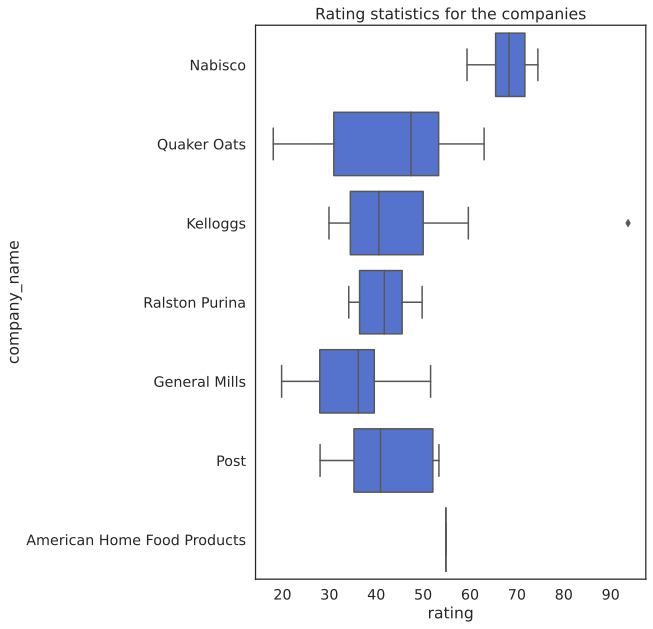

In [75]:
# write your code here
sns.set(rc={'figure.figsize': (7, 10), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    # seaborn's boxplot
    ax = sns.boxplot(
        data=data,
        x='rating',
        y='company_name',
        color='royalblue'
    )
    
    ax.set_title('Rating statistics for the companies')

###### 6.2.3 Exercise 3

Find and visualize the ratings per product. You will find the necessary data in the `data` dataframe.

In [ ]:
data = cereals[['name', 'rating']].groupby('name').mean().reset_index()

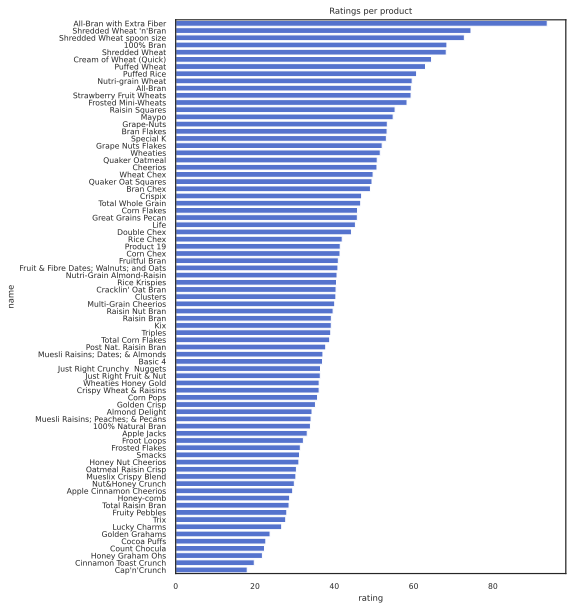

In [93]:
# write your code here
sns.set(rc={'figure.figsize': (7, 10), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=0.7):
    # seaborn's countplot
    ax = sns.barplot(
        data=data,
        y='name',
        x='rating',
        order=data.sort_values('rating', ascending=False).name,
        color = 'royalblue'
    )
    ax.set_title('Ratings per product')

From this chart, we can see that it is not relevant to compare companies that have very few ratings. For example, here the American Home Food Products has received only 1 rating.

###### 6.2.4 Exercise 4

Find if there is a correlation between any of the numerical  features we have in the dataset. Again you will find the data needed in the `data_1` and `data_2` dataframes. We have split them so that the output would  be visible and readable. Your task is to pick the correct visualization method and supply the data there.

In [63]:
data_1 = cereals[['calories', 'protein', 'fat', 'sodium', 'rating']]
data_2 = cereals[['fiber', 'carbo', 'sugars', 'potass', 'rating']]

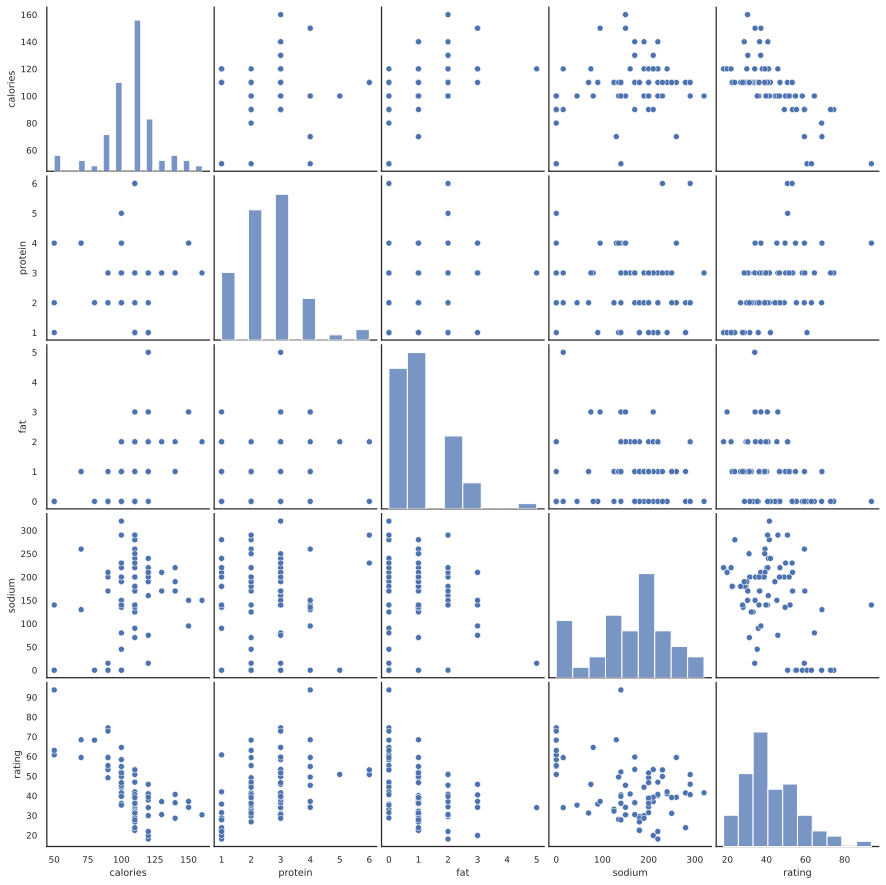

In [62]:
#write your code here for data_1
sns.set(rc={'figure.figsize':(3, 4), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=0.8): 
    sns.pairplot(data_1, kind="scatter", palette="Set2")
    plt.show()

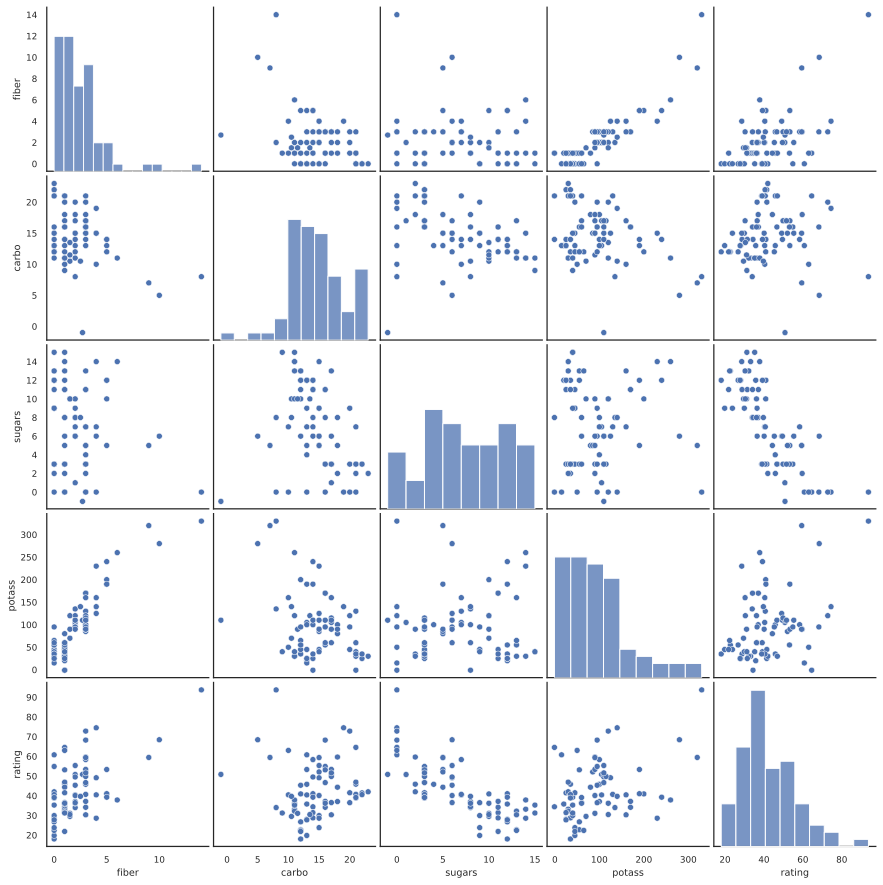

In [64]:
#write your code here for data_2
sns.set(rc={'figure.figsize':(3, 4), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=0.8): 
    sns.pairplot(data_2, kind="scatter", palette="Set2")
    plt.show()

As we can see from the plots, the features are mostly not correlated. There is a somewhat weak negative correlation between the amount of sugar and rating, a weak positive correlation between the amount of fiber and potassium and a somewhat weak negative correlation between calories and rating.

###### 6.2.5 Exercise 5

Your next task is to find and visualize these correlations. As always, the data will be ready for you in the `data` dataframe, you will only have to find the correct visualization method and supply the correct arguments to the function

In [76]:
data = cereals[['fiber', 'potass', 'sugars', 'calories','rating']]

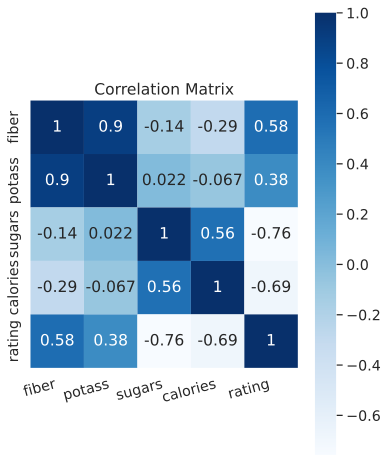

In [78]:
#write your code here
sns.set(rc={'figure.figsize':(6, 8), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    correlation_matrix = data.corr()
    ax = sns.heatmap(data=correlation_matrix,
                cmap='Blues',
                annot=True,
                square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=15,
        horizontalalignment='right'
    )
    ax.set_title('Correlation Matrix')

###### 6.2.6 Exercise 6

Using a scatterplot with a color scale plot the potassium amount to the fiber amount and the rating. The data to be used is ready for you in the `data` dataframe.

In [97]:
data = cereals[['potass', 'fiber', 'rating']]

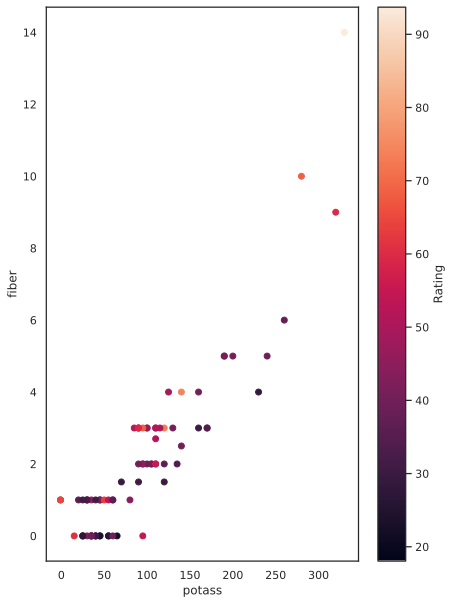

In [98]:
# write your code here
fig, ax = plt.subplots()

sc = ax.scatter(data.potass, data.fiber, c=data.rating)
ax.set_ylabel('fiber')
ax.set_xlabel('potass')
cbar = fig.colorbar(sc)
cbar.set_label("Rating")

plt.show()